# <center> Домашнее задание 5</center>

**1. [15 баллов]** Изучите [набор данных](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) по сотрудникам одной крупной IT компании. Посмотрите на описательные статистики по всем столбцам (как по количественным, так и по порядковым и категориалным переменным). В переменной ```JobSatisfaction``` приведите значения к бинарному виду. Значения $1$ и $2$ должны стать нулями, а значения от $3$ до $4$ - единицами. 

**2. [20 баллов]** Отберите N признаков (подвыборку наиболее важных, на ваш взгляд, признаков или все имеющиеся) и постройте модель логистической регрессии с k-fold кросс-валидацией ($k=5$) и $L_2$ регуляризацией, где в качестве целевой переменной будем предсказывать удовлетворенность работой по преобразованной переменной ```JobSatisfaction``` ($0$ - неудовлетворенность, $1$ - удовлетворенность). Напишите, какой это тип задачи машинного обучения (регрессия, кластеризация или что-то другое). Проинтерпретируйте полученные коэффициенты обученной модели. 

**3. [20 баллов]** Постройте дерево решений на всех признаках, используя энтропийный критерий, и визуализируйте его через библиотеку graphviz (или sklearn.export_graphiz и импорт изображения). Проинтерпретируйте, через какие предикаты в дереве (логические выражения признаков и их значений) Вы получили предсказания положительного класса (для всех листьев с предсказанием $1$).

**4. [20 баллов]** Обучите случайный лес и подберите к нему параметры ```n_estimators, max_depth, min_samples_leaf, max_features```, используя ```GridSearchCV``` или ```RandomizedSearchCV```.

**5. [25 баллов]** Создайте предсказания для вашей выборки, имитируя константный (всегда предсказывающий метку класса 1) и случайный (для каждого наблюдения равновероятно предсказывающий метки класса $1$ или $0$) классификаторы. Постройте ROC кривые для логистической регрессии, дерева решений, случайного леса, константного и случайного классификаторов на одном графике и сделайте выводы о качестве полученных моделей. Для лучшей (по метрике AUC) модели посчитайте матрицу ошибок, Accuracy, Precision и Recall. 

* **Бонусное [30 баллов]** Придумайте 10 новых признаков на основе имеющихся и при построении модели покажите, что суммарно они улучшают качество вашей лучшей модели хотя бы на 3% (по метрике AUC).

In [274]:
# Your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import graphviz
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

In [275]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from scipy import stats 
# import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, roc_auc_score
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve, accuracy_score, precision_score, recall_score,r2_score

In [276]:
#№1
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [277]:
df['JobSatisfaction']=df['JobSatisfaction'].replace(1,0).replace(2,0).replace(3,1).replace(4,1)

In [278]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
Age,41,49,37,33,27,32,59,30,38,36,...,29,50,39,31,26,36,39,27,49,34
Attrition,Yes,No,Yes,No,No,No,No,No,No,No,...,No,Yes,No,No,No,No,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,...,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591,1005,1324,1358,216,1299,...,468,410,722,325,1167,884,613,155,1023,628
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,...,Research & Development,Sales,Sales,Research & Development,Sales,Research & Development,Research & Development,Research & Development,Sales,Research & Development
DistanceFromHome,1,8,2,3,2,2,3,24,23,27,...,28,28,24,5,5,23,6,4,2,8
Education,2,1,2,4,1,2,3,1,3,3,...,4,3,1,3,3,2,1,3,3,3
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical,Life Sciences,Medical,Life Sciences,Life Sciences,Medical,...,Medical,Marketing,Marketing,Medical,Other,Medical,Medical,Life Sciences,Medical,Medical
EmployeeCount,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
EmployeeNumber,1,2,4,5,7,8,10,11,12,13,...,2054,2055,2056,2057,2060,2061,2062,2064,2065,2068


In [279]:
# Причешим наши данные
features = df.drop(['JobSatisfaction'], 1) 
labels = df['JobSatisfaction'] 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
columns=[c for c in df]
b=[]
for column in columns:
    if df[column].dtype not in numerics:
        b.append(column)
b

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [280]:
# Исследуем корретность данных
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [281]:
df.describe().transpose().filter(['max','min','mean']) # Заметим, что в графе EmployeeNumber cлишком низкое минимальное значение

,max,min,mean
Age,60.0,18.0,36.923810
DailyRate,1499.0,102.0,802.485714
DistanceFromHome,29.0,1.0,9.192517
Education,5.0,1.0,2.912925
EmployeeCount,1.0,1.0,1.000000
EmployeeNumber,2068.0,1.0,1024.865306
EnvironmentSatisfaction,4.0,1.0,2.721769
HourlyRate,100.0,30.0,65.891156
JobInvolvement,4.0,1.0,2.729932
JobLevel,5.0,1.0,2.063946


In [282]:
df.query('EmployeeNumber > 1000')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
717,27,No,Travel_Rarely,1134,Research & Development,16,4,Technical Degree,1,1001,...,2,80,1,4,2,3,2,2,2,2
718,45,No,Non-Travel,248,Research & Development,23,2,Life Sciences,1,1002,...,3,80,1,9,2,3,9,8,0,8
719,47,No,Travel_Rarely,955,Sales,4,2,Life Sciences,1,1003,...,3,80,0,9,0,3,9,0,0,7
720,30,Yes,Travel_Rarely,138,Research & Development,22,3,Life Sciences,1,1004,...,2,80,0,7,2,3,5,2,0,1
721,50,No,Travel_Rarely,939,Research & Development,24,3,Life Sciences,1,1005,...,4,80,1,22,2,3,12,11,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


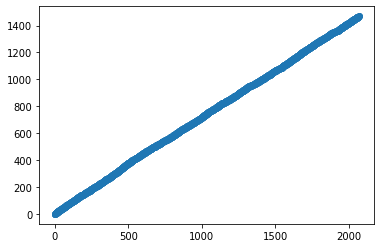

In [283]:
plt.scatter(df.EmployeeNumber,range(len(df))); 

In [284]:
# Для подготовки данных к построению модели код взят с http://blog.datalytica.ru/2018/04/blog-post.html
label_encoder = LabelEncoder() 
for j in range(len(b)):
    label_encoded_data = label_encoder.fit_transform(features[b[j]])
    features[b[j]]=label_encoded_data.tolist()
    

In [285]:
# Разделим нашу выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test=train_test_split(features,labels, test_size=0.3, stratify=labels, random_state=777)


In [286]:
X_train

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
5,32,0,1,1005,1,2,2,1,1,8,...,3,80,0,8,2,2,7,7,3,6
1327,46,0,2,1319,2,3,3,5,1,1863,...,4,80,1,25,5,3,19,17,2,8
528,50,1,1,562,2,8,2,5,1,723,...,1,80,1,18,4,3,4,3,1,3
364,37,0,2,921,1,10,3,3,1,486,...,2,80,1,17,3,3,5,4,0,3
303,31,0,2,218,2,7,3,5,1,416,...,2,80,1,10,3,2,8,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,29,0,2,1389,1,21,4,1,1,20,...,3,80,1,10,1,3,10,9,8,8
48,46,0,1,1211,2,5,4,2,1,62,...,3,80,0,14,4,3,9,6,0,8
1353,34,1,0,967,1,16,4,5,1,1905,...,2,80,1,5,2,3,5,2,3,0
177,19,1,2,303,1,2,3,1,1,243,...,3,80,0,1,3,2,1,0,1,0


In [287]:
# Стандартизируем X_train и X_test
from sklearn.preprocessing import StandardScaler
scale_features_std = StandardScaler() 
X_train = scale_features_std.fit_transform(X_train) 
X_test = scale_features_std.transform(X_test)

In [288]:
#№2
# для начала проведем кросс-валидацию
logit=LogisticRegression(penalty='l2', solver='sag')
tuned_parameters = {'C':[i for i in range(49,60)]}
GridS=GridSearchCV(logit,param_grid=tuned_parameters ,cv=5,scoring='roc_auc', n_jobs=-1)

In [289]:
model=GridS.fit(X_train,y_train)

In [290]:
model.best_params_['C']

56

In [291]:
y_pred_train=model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(roc_auc_score(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))
print(precision_score(y_train, y_pred_train))
print(recall_score(y_train, y_pred_train))

[[ 74 324]
 [ 61 570]]
0.5446288494771799
0.6258503401360545
0.6375838926174496
0.9033280507131537


In [292]:
y_pred_test=model.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(roc_auc_score(y_test, y_pred_test))
print(accuracy_score(y_test, y_pred_test))
print(precision_score(y_test, y_pred_test))
print(recall_score(y_test, y_pred_test))

[[ 19 152]
 [ 28 242]]
0.5037037037037038
0.5918367346938775
0.6142131979695431
0.8962962962962963


In [293]:
logitoptimal=LogisticRegression(penalty='l2', C=model.best_params_['C'], solver='sag')

In [294]:
trenim=logitoptimal.fit(X_train,y_train)

In [295]:
print(trenim.coef_)

[[ 0.08361786 -0.20520517 -0.10004226  0.08271225  0.13229434  0.03930443
   0.005688   -0.05544134  0.         -0.11670153 -0.08914848  0.07130162
  -0.10027776 -0.03651409  0.09042056 -0.04191477  0.0964744  -0.04587278
  -0.00883162 -0.09852098  0.          0.16651014  0.10354001 -0.07461025
  -0.09544946  0.          0.11277496 -0.12348039 -0.01002975 -0.01662697
   0.02877921  0.12323646  0.01757314 -0.19701116]]


In [296]:
print(trenim.intercept_)

[0.4796264]


In [297]:
trenim_test=logitoptimal.fit(X_test,y_test)
print(trenim_test.coef_)
print(trenim_test.intercept_)

[[ 0.02939711 -0.25165181 -0.02002141  0.16550687 -0.19818385 -0.00308379
  -0.05987997 -0.00348797  0.          0.01193605 -0.09494565  0.04137151
  -0.26134947 -0.10164883  0.14247907  0.10492438  0.1607641  -0.07910518
   0.04932793 -0.05113812  0.         -0.01582233 -0.07199926 -0.06719247
   0.04926084  0.         -0.08354384 -0.20611264 -0.14794656 -0.08395052
   0.16336381 -0.05039487 -0.10029192  0.00058995]]
[0.46041014]


In [298]:
# Задача на бинарную классификацию!
# Интерпретация
# Исходя из коэффициентов (coef_) можно заключить, что существуют признаки, которые не влияют на целевую переменную, а именно признаки EmployeeCount
# StandardHours и Over18, что логично, поскольку эти данные у всех опрашиваемых идентичны и по ним нельзя сделать какие_то прогнозы.
# Наибольшая отрицательная зависимость наблюдается с переменной HourlyRate. В целом отрцательно и положительные зависимости переменных распределены неравномерно (отрицательных больше) и не превосходят по модулю 0.3
# Отрицательные коэффициенты показывают, что соответствующие признаки уменьшают вероятность того, что работник доволен работой, положительные же наоборот её увеличивают.
# Интерсепт положительный, значит базовое значение, которое достигается при признаках равных 0, должно быть ~0.46,чтобы быть уверенными, что работник не доволен своей работой

In [299]:
#№3
clf_tree=DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=7)

In [300]:
clf_tree=clf_tree.fit(X_train,y_train)

In [301]:
p_hat=clf_tree.predict(X_train)
print(confusion_matrix(y_train,p_hat))
print(roc_auc_score(y_train,p_hat))
print(accuracy_score(y_train,p_hat))
print(recall_score(y_train,p_hat))
print(precision_score(y_train,p_hat))

[[ 21 377]
 [  3 628]]
0.5240047304669146
0.630709426627794
0.9952456418383518
0.6248756218905472


In [302]:
confusion_matrix(y_train,p_hat)

array([[ 21, 377],
       [  3, 628]], dtype=int64)

In [303]:
#Из теста видно, что модель переобучилась!!! Подбор лучших коэффициентов сделаем в номере 4
p_hat_test=clf_tree.predict(X_test)
print(confusion_matrix(y_test,p_hat_test))
print(roc_auc_score(y_test,p_hat_test))
print(accuracy_score(y_test,p_hat_test))
print(recall_score(y_test,p_hat_test))
print(precision_score(y_test,p_hat_test))

[[  5 166]
 [  7 263]]
0.5016569200779728
0.6077097505668935
0.9740740740740741
0.6130536130536131


In [304]:
features.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [305]:
# Преподаватели разрешили использование plot_tree (см. чат)
plt.figure(figsize=(200,200))
plot_tree(clf_tree,feature_names=features.columns,class_names='01');

In [ ]:
# Пойдём по дереву сверху вниз. Имеем: высокая энтропия (необходим большой объем информации, чтобы определённо сказать какое
# значение примет целевая переменная). Далее берем среднее третьего отнормированного столбца и ставим ограничение. в правом листе
# энтропия оказывается больше заданного значения, энтропия там равна 0, там же отобраны 9 значений равных 1.
# Далее алгоритм ищет новоое значение для переменной DailyRate, по которому он будет отбирать класс (логический оператор: '<=')
# После отбора (все значения, не удовлетворяющие неравенству алгоритм относит к class=1) попадаем в лист для признака TotalWorkingYears
# 











In [135]:
#№4
clf_randomTree=RandomForestClassifier()
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,100, 4),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }
GridRandom=GridSearchCV(clf_randomTree,param_grid=parametrs,cv=5, n_jobs=-1, scoring='roc_auc')

In [142]:
forest=GridRandom.fit(X_train,y_train)

In [143]:
forest.best_params_

{'max_depth': 45,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 10}

In [144]:
ura=forest.predict(X_train)

In [145]:
confusion_matrix(y_train,ura)

array([[362,  36],
       [  5, 626]], dtype=int64)

In [146]:
roc_auc_score(y_train,ura)

0.9508119042120269

In [147]:
ura_test=forest.predict(X_test)

In [148]:
confusion_matrix(y_test,ura_test)

array([[ 35, 136],
       [ 69, 201]], dtype=int64)

In [149]:
roc_auc_score(y_test,ura_test)

0.47456140350877196

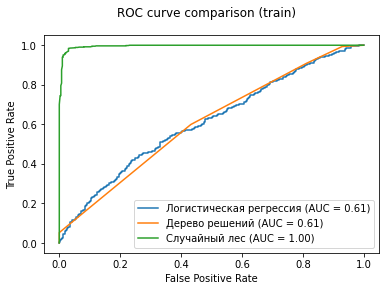

In [150]:
logress_train=plot_roc_curve(model,X_train,y_train,name='Логистическая регрессия');
Trees_train=plot_roc_curve(clf_tree,X_train,y_train,ax=logress_train.ax_, name='Дерево решений')
Forests_train=plot_roc_curve(forest,X_train,y_train,ax=Trees_train.ax_, name='Случайный лес')
Forests_train.figure_.suptitle("ROC curve comparison (train)")
plt.show()

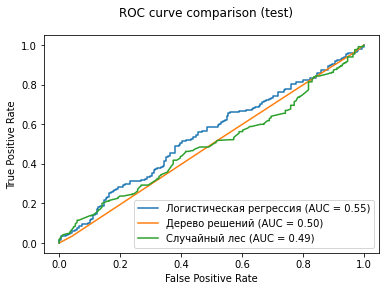

In [151]:
logress=plot_roc_curve(model,X_test,y_test,name='Логистическая регрессия');
Trees=plot_roc_curve(clf_tree,X_test,y_test,ax=logress.ax_, name='Дерево решений');
Forests=plot_roc_curve(forest,X_test,y_test,ax=Trees.ax_, name='Случайный лес');
Forests.figure_.suptitle("ROC curve comparison (test)")
plt.show()

In [152]:
len(X_train)

1029

In [153]:
y_const_=np.ones(len(X_train)).astype(int)

In [154]:
y_const_[0]=0

In [155]:
logit_const=LogisticRegression(C=100000)
mod_=logit_const.fit(X_train, y_const_)

In [156]:
y_pred_const=mod_.predict(X_train)

In [157]:
y_pred_const_test=mod_.predict(X_test)

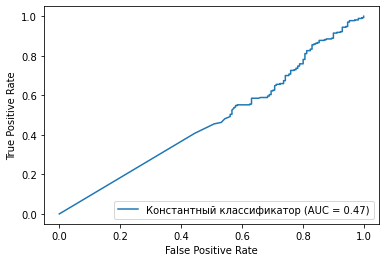

In [159]:
const_ckassifier=plot_roc_curve(mod_,X_test,y_test, name='Константный классификатор'); 

In [160]:
X_test

array([[-0.08170594, -0.43384526,  0.5823422 , ...,  0.78551556,
         1.48103939,  0.81636568],
       [ 1.56683165, -0.43384526,  0.5823422 , ..., -1.14556587,
        -0.68108601, -1.13332994],
       [ 0.90741661, -0.43384526, -2.41380841, ...,  0.78551556,
         0.86328928,  0.81636568],
       ...,
       [ 1.67673416, -0.43384526,  0.5823422 , ..., -0.59382832,
        -0.0633359 , -0.57627405],
       [ 0.90741661, -0.43384526,  0.5823422 , ..., -1.14556587,
        -0.37221095,  0.81636568],
       [-0.19160845, -0.43384526,  0.5823422 , ..., -0.04209077,
         0.55441422, -0.2977461 ]])

In [161]:
equal_proba_train=X_train[0]

In [162]:
equal_proba_train

array([-0.52131597, -0.43384526, -0.91573311,  0.53086354, -0.47809837,
       -0.87690259, -0.8729041 , -0.93777009,  0.        , -1.72327844,
        1.19198614,  0.80562923,  0.60328072,  0.36560202, -0.93175451,
       -0.98381502,  1.23908086, -0.71584969, -0.36363737, -1.06051679,
        0.        , -0.62794024, -0.5990276 , -0.41792049,  0.25689754,
        0.        , -0.94190235, -0.39713868, -0.63657047, -1.08404703,
        0.00932909,  0.78551556,  0.24553916,  0.53783773])

In [163]:
zero=np.zeros((1000,34))

In [164]:
for g in range(1000) :
    zero[g]=equal_proba_train
    

In [165]:
Zero_train=zero

In [166]:
odin=np.ones(1000).astype(int)

In [167]:
for c in range(500):
    odin[c]=0

In [168]:
odin_train=odin

In [169]:
log_50_proba=LogisticRegression(C=10000)
log_50_proba.fit(Zero_train,odin_train)

LogisticRegression(C=10000)

In [170]:
y_50=log_50_proba.predict_proba(Zero_train)

In [171]:
y_50

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       ...,
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]])

In [172]:
y_50_test=log_50_proba.predict_proba(X_test)

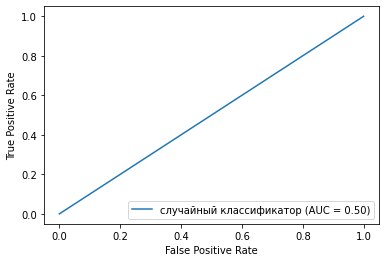

In [174]:
sluchayniy_classificator=plot_roc_curve(log_50_proba,X_test,y_test, name='случайный классификатор');

<Figure size 14400x14400 with 0 Axes>

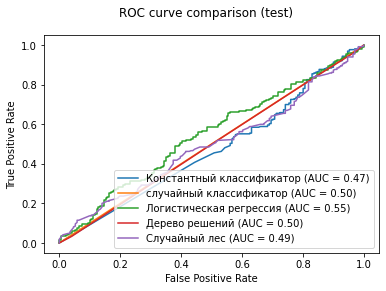

In [175]:
plt.figure(figsize=(200,200));
const_ckassifier=plot_roc_curve(mod_,X_test,y_test, name='Константный классификатор'); 
sluchayniy_classificator=plot_roc_curve(log_50_proba,X_test,y_test,ax=const_ckassifier.ax_, name='случайный классификатор');
logress=plot_roc_curve(model,X_test,y_test,ax=sluchayniy_classificator.ax_, name='Логистическая регрессия');
Trees=plot_roc_curve(clf_tree,X_test,y_test,ax=logress.ax_, name='Дерево решений');
Forests=plot_roc_curve(forest,X_test,y_test,ax=Trees.ax_, name='Случайный лес');
Forests.figure_.suptitle("ROC curve comparison (test)")
plt.show()

In [306]:
# коэффициенты для логистической регрессии еще раз (см №2)
print(confusion_matrix(y_test, y_pred_test))
print(roc_auc_score(y_test, y_pred_test))
print(accuracy_score(y_test, y_pred_test))
print(precision_score(y_test, y_pred_test))
print(recall_score(y_test, y_pred_test))

[[ 19 152]
 [ 28 242]]
0.5037037037037038
0.5918367346938775
0.6142131979695431
0.8962962962962963


In [261]:
# доп

df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df['JobSatisfaction']=df['JobSatisfaction'].replace(1,0).replace(2,0).replace(3,1).replace(4,1)
features = df.drop(['JobSatisfaction'], 1) 
labels = df['JobSatisfaction'] 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
columns=[c for c in df]
b=[]
for column in columns:
    if df[column].dtype not in numerics:
        b.append(column)
# Для подготовки данных к построению модели код взят с http://blog.datalytica.ru/2018/04/blog-post.html
label_encoder = LabelEncoder() 
for j in range(len(b)):
    label_encoded_data = label_encoder.fit_transform(features[b[j]])
    features[b[j]]=label_encoded_data.tolist()
X_train, X_test, y_train, y_test=train_test_split(features,labels, test_size=0.3, stratify=labels, random_state=777)
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
Age,41,49,37,33,27,32,59,30,38,36,...,29,50,39,31,26,36,39,27,49,34
Attrition,Yes,No,Yes,No,No,No,No,No,No,No,...,No,Yes,No,No,No,No,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,...,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591,1005,1324,1358,216,1299,...,468,410,722,325,1167,884,613,155,1023,628
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,...,Research & Development,Sales,Sales,Research & Development,Sales,Research & Development,Research & Development,Research & Development,Sales,Research & Development
DistanceFromHome,1,8,2,3,2,2,3,24,23,27,...,28,28,24,5,5,23,6,4,2,8
Education,2,1,2,4,1,2,3,1,3,3,...,4,3,1,3,3,2,1,3,3,3
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical,Life Sciences,Medical,Life Sciences,Life Sciences,Medical,...,Medical,Marketing,Marketing,Medical,Other,Medical,Medical,Life Sciences,Medical,Medical
EmployeeCount,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
EmployeeNumber,1,2,4,5,7,8,10,11,12,13,...,2054,2055,2056,2057,2060,2061,2062,2064,2065,2068


In [262]:
X_train['+']=X_train['Gender']+X_train['JobRole']

<ipython-input-262-f97aa2b92ea0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['+']=X_train['Gender']+X_train['JobRole']


In [263]:
X_test['+']=X_test['Gender']+X_test['JobRole']

<ipython-input-263-3838da9125d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['+']=X_test['Gender']+X_test['JobRole']


In [264]:
X_train["Age-mean"] = X_train.groupby("MonthlyIncome")["Age"].transform(lambda x: x.fillna(x.median()))

<ipython-input-264-0a067221f231>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Age-mean"] = X_train.groupby("MonthlyIncome")["Age"].transform(lambda x: x.fillna(x.median()))


In [265]:
X_test["Age-mean"] = X_test.groupby("MonthlyIncome")["Age"].transform(lambda x: x.fillna(x.median()))

<ipython-input-265-a1cab2cb1377>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Age-mean"] = X_test.groupby("MonthlyIncome")["Age"].transform(lambda x: x.fillna(x.median()))


In [266]:
X_train['log']=np.log(X_train['HourlyRate'])

<ipython-input-266-9c2e8795faf1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['log']=np.log(X_train['HourlyRate'])


In [267]:
X_test['log']=np.log(X_test['HourlyRate'])

<ipython-input-267-6f3dcda0f2cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['log']=np.log(X_test['HourlyRate'])


In [268]:
X_train['**2']=X_train['PerformanceRating']**2

<ipython-input-268-c6a6e0ee2fd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['**2']=X_train['PerformanceRating']**2


In [269]:
X_test['**2']=X_test['PerformanceRating']**2

<ipython-input-269-06b4947f17e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['**2']=X_test['PerformanceRating']**2


In [270]:
X_train['Role*income']=X_train['MonthlyIncome']**X_train['Age'].mean()

<ipython-input-270-46440d4e296f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Role*income']=X_train['MonthlyIncome']**X_train['Age'].mean()


In [271]:
X_test['Role*income']=X_test['MonthlyIncome']**X_test['Age'].mean()

<ipython-input-271-d3310888f213>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Role*income']=X_test['MonthlyIncome']**X_test['Age'].mean()


In [272]:
from sklearn.preprocessing import StandardScaler
scale_features_std = StandardScaler() 
X_train = scale_features_std.fit_transform(X_train) 
X_test = scale_features_std.transform(X_test)

C:\Users\Asus\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


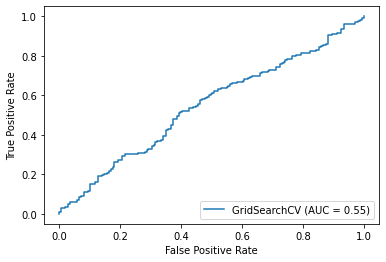

In [273]:
logit_3=LogisticRegression(penalty='l2', solver='sag')
tuned_parameters = {'C':[i for i in range(29,60)]}
GridS2=GridSearchCV(logit_3,param_grid=tuned_parameters ,cv=5,scoring='roc_auc', n_jobs=-1)
model_0_=GridS2.fit(X_train,y_train)
model_0_.best_params_
plot_roc_curve(model_0_,X_test,y_test);